#### 30분 간격으로 저장된 고가/저가 데이터로부터, 주기(N)을 파라메터로 입력받아 N 주기의 OHLC 데이터를 만듬
** N 주기를 다 구현할 필요가 없어서 일단 30분봉(N=minute) 과 일봉(N=day)만 구현했음

In [1]:
import os, sys, pickle
sys.path.append('../')
sys.path.append('../scripts')
import tables as tb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from models import OHLC, Products, Product, Minute
from tools import ohlc_chart, view

In [2]:
""" DB 로드"""
products = pickle.load(open('../data/products.pkl', 'rb')) #종목정보
db = tb.open_file('../data/rawminute.db', mode='r')
#filters = tb.Filters(complib='blosc', complevel=9)
#db = tb.open_file('../data/rawminute.db', mode='a', filters=filters) #분데이터 db 로드

In [3]:
""" Data 로드"""
data = db.root['ADH19'].read_sorted(sortby='date')
df = pd.DataFrame(data, index=data['date'].astype('M8[s]'))
df['date'] = df['date'].astype('M8[s]')

In [9]:
def ohlc(data, period='minute'):
    df = pd.DataFrame(data[['open','high','low','close','volume']], index=data['date'].astype('M8[s]'))
    if period == 'minute':
        return df
    elif period == 'day':
        df = df.groupby(pd.Grouper(freq='24H',closed='left', label='left', base=8)).\
                   agg({'open':'first', 'high':'max', 'low':'min', 'close':'last', 'volume': 'sum'}).dropna()
        df.index = df.index.values.astype('M8[ns]').astype('M8[D]')
        return df

In [5]:
ohlc(data)[:3]

,open,high,low,close,volume
2019-02-08 00:30:00,0.7115,0.7116,0.7110,0.7114,2789
2019-02-08 01:00:00,0.7114,0.7117,0.7104,0.7113,5632
2019-02-08 01:30:00,0.7113,0.7115,0.7101,0.7102,3688


In [6]:
ohlc(data, period='day')

,open,high,low,close,volume
2019-02-07,0.7115,0.7117,0.7093,0.7107,29248
2019-02-08,0.7101,0.7106,0.7064,0.7092,95373
2019-02-11,0.7093,0.7112,0.7061,0.7066,75156
2019-02-12,0.7063,0.7107,0.7058,0.7100,82914
2019-02-13,0.7099,0.7139,0.7090,0.7094,93436
2019-02-14,0.7093,0.7135,0.7074,0.7107,92283
2019-02-15,0.7105,0.7127,0.7083,0.7119,58685


In [7]:
ohlc(data, period='minute')

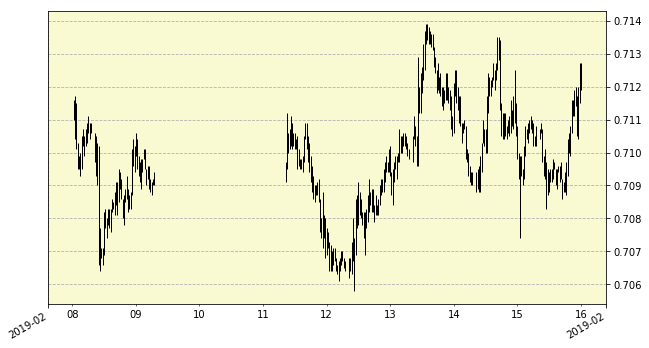

In [10]:
view(ohlc(data, period='minute'), period='minute', colors=['r','b'])

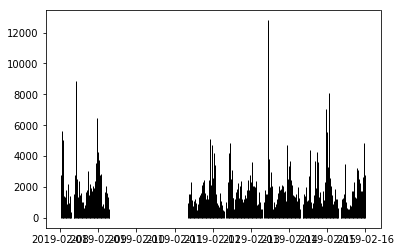

In [26]:
d = ohlc(data, period='minute')
ax = plt.subplot()
ax.vlines(d.index, 0, d['volume'], linewidth=1)

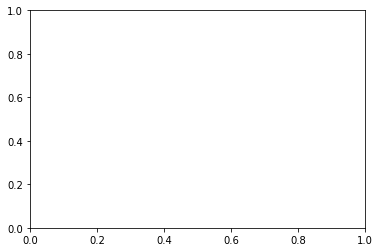

In [22]:
plt.subplot()